<a href="https://colab.research.google.com/github/SAIGANESH02/Wine_Quality_Prediction/blob/main/WineQualityRed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
!pip install tensorflow==2.0.0alpha

     |████████████████████████████████| 80.3MB 42kB/s 
     |████████████████████████████████| 3.0MB 53.6MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 419kB 53.0MB/s 
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import pandas as pd
import numpy as np

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [ ]:
df = pd.read_csv("winequality-red.csv")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Train test split

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3)

In [ ]:
train.shape

(1119, 12)

In [ ]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
332,8.0,0.580,0.28,3.2,0.066,21.0,114.0,0.99730,3.22,0.54,9.4,6
1480,5.6,0.620,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.1,4
1278,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5,6
52,6.6,0.500,0.04,2.1,0.068,6.0,14.0,0.99550,3.39,0.64,9.4,6
796,8.7,0.460,0.31,2.5,0.126,24.0,64.0,0.99746,3.10,0.74,9.6,5


In [ ]:
test.shape

(480, 12)

In [ ]:
# Normalize the data. Extremely Important
train_x = train.drop('quality', axis=1)
train_y = train['quality']
train_x=(train_x-train_x.min())/(train_x.max()-train_x.min())

test_x = test.drop('quality', axis=1)
test_y = test['quality']
test_x=(test_x-test_x.min())/(test_x.max()-test_x.min())

In [ ]:
train_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
332,0.294643,0.315068,0.28,0.157534,0.090150,0.281690,0.381625,0.530837,0.377953,0.104294,0.140625
1480,0.080357,0.342466,0.03,0.041096,0.113523,0.070423,0.024735,0.360499,0.724409,0.153374,0.250000
1278,0.294643,0.407534,0.22,0.095890,0.105175,0.169014,0.265018,0.500000,0.393701,0.104294,0.156250
52,0.169643,0.260274,0.04,0.082192,0.093489,0.070423,0.028269,0.398678,0.511811,0.165644,0.140625
796,0.357143,0.232877,0.31,0.109589,0.190317,0.323944,0.204947,0.542584,0.283465,0.226994,0.171875


In [ ]:
train_y.head()

332     6
1480    4
1278    6
52      6
796     5
Name: quality, dtype: int64

In [ ]:
train_y.max()

8

In [ ]:
train_y.min()

3

In [ ]:
no_features = train_x.shape[1]
no_features

11

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=[no_features]),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

In [ ]:
model.compile(optimizer='adam',loss=['mse'], 
              metrics=['mae'])

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['loss'] < 0.35:
            print("MSE less than 0.35. No futher training required. Otherwise \
                  data will overfit")
            self.model.stop_training = True

In [ ]:
callbacks = MyCallback()

In [ ]:
history = model.fit(train_x, train_y, epochs=500, callbacks=[callbacks])

Epoch 1/500
1119/1119 [==============================] - 0s 127us/sample - loss: 32.4933 - mae: 5.6443
Epoch 2/500
1119/1119 [==============================] - 0s 34us/sample - loss: 32.4933 - mae: 5.6443
Epoch 3/500
1119/1119 [==============================] - 0s 32us/sample - loss: 32.4933 - mae: 5.6443
Epoch 4/500
1119/1119 [==============================] - 0s 45us/sample - loss: 32.4933 - mae: 5.6443
Epoch 5/500
1119/1119 [==============================] - 0s 36us/sample - loss: 32.4933 - mae: 5.6443
Epoch 6/500
1119/1119 [==============================] - 0s 36us/sample - loss: 32.4933 - mae: 5.6443
Epoch 7/500
1119/1119 [==============================] - 0s 34us/sample - loss: 32.4933 - mae: 5.6443
Epoch 8/500
1119/1119 [==============================] - 0s 34us/sample - loss: 32.4933 - mae: 5.6443
Epoch 9/500
1119/1119 [==============================] - 0s 36us/sample - loss: 32.4933 - mae: 5.6443
Epoch 10/500
1119/1119 [==============================] - 0s 45us/sample - loss: 

Text(0.5, 0, 'Epochs')

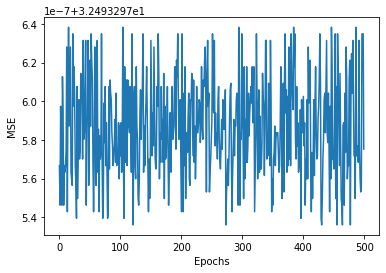

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

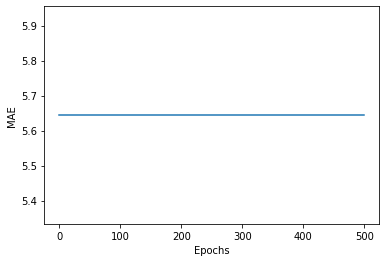

In [ ]:
plt.plot(history.epoch, history.history['mae'])
plt.ylabel('MAE')
plt.xlabel('Epochs')

In [ ]:
test_mse, test_mae = model.evaluate(test_x, test_y)

480/480 [==============================] - 0s 97us/sample - loss: 32.2375 - mae: 5.6167


In [ ]:
tf.keras.metrics.Accuracy

tensorflow.python.keras.metrics.Accuracy

In [ ]:
test_mse

32.2375

In [ ]:
test_mae

5.616667

In [ ]:
train.to_csv('red_wine_train_data.csv',index=None)

In [ ]:
test.to_csv('red_wine_test_data.csv',index=None)

In [ ]:
tf.saved_model.save(model, 'red_wine_saved_model')